# User defined Decision Tree

In [ ]:
from sklearn import datasets
import pandas as pd
import math

In [2]:
def entropy(arr):            #calculating entropy of nodes
    entropy= 0
    total= sum(arr)
    for j in arr:
        try:
            frac= j/total
            entropy += (-1 * frac * math.log(frac))
        except:
            continue
    return entropy
    

In [11]:
def continous_slection(df, feature, i):   #selecting the point from continuos points having least split entropy
    
    parent_node= df[feature].shape[0]
    
    df_smaller= df[df[feature]< i]                  #df in which datapoints in a particular feature is less than i
    count_values= df_smaller['Flower type'].value_counts()  #counting number of 0,1,2(in output) in the data set
    dic_smaller= count_values.to_dict()  
    dp_node_smaller= count_values.sum()
    
    entropy_smaller= entropy(count_values.values)        #calculating entropy of left node

        
        
    df_greater=  df[df[feature]>= i]        #df in which datapoints in a particular feature is greater than equal to than i
    count_values=  df_greater['Flower type'].value_counts()  # #counting number of 0,1,2(in output) in the data set
    dic_greater= count_values.to_dict()
    dp_node_greater= count_values.sum()
    
    entropy_greater= entropy(count_values.values)        #calculating entropy of left node

    #calculating entropy split
    entropy_split= ((dp_node_smaller/parent_node) * entropy_smaller) + ((dp_node_greater/parent_node) * entropy_greater)
    split_dic= {'smaller' : dic_smaller, 'df_smaller' : df_smaller, 
                    'greater' : dic_greater, 'df_greater' : df_greater, 'point' : i}    
    
        
    return entropy_split, split_dic

In [13]:
def select_feature(node, df, features):       #selecting a feature to split upon
    feature_entropy_min= 9

    for feature in features:           #loop for checking all features one by one
        a= df[feature].unique()        # finding unique values in the particular feature
        a.sort()                       #sorting in ascending order
        middle=[]
        for i in range(len(a)-1):       #calculating mid point of 2 consecutive points and appending it in a list
            value= (a[i]+a[i+1])/2
            middle.append(value)

        entropy_min= 9
        min_split_dic = {}
        

        for j in middle:                           #loop for selecting a point with least entropy from middle
            
            if entropy_split<= entropy_min:   
                entropy_min = entropy_split
                min_split_dic= split_dic.copy()

        
        if entropy_min <= feature_entropy_min:   #finding the feature with least entropy
            feature_entropy_min = entropy_min
            feature_split_details= min_split_dic
            selected_feature= feature
            
            
    #information gain
    entropy_parent= entropy(node['count'])      #calculating entropy of parent node
    gain= entropy_parent- feature_entropy_min    #calculating information gain
    
    feature_split_details['gain']= gain   
    
    return selected_feature, feature_split_details 

In [5]:
def parent_node_(df):                # root_node
    count=[]
    datapoint= df.shape[0]
    for i in range(3):
        count.append(df[df['Flower type']==i].count()[0])
        
    node= {'datapoint' : datapoint, 'count' : count}
        
    return node


def node_(arr):             #creating nodes
    count=[]
    datapoint= sum(arr.values())
    for i in range(3):
        try:
            count.append(arr[i])
        except:
            count.append(0)
            
    node= {'datapoint' : datapoint, 'count' : count}  
    return node 

In [15]:
def split(features, selected_feature, feature_split_details, level):
    
    level += 1    #increasing level
    
    df_left= feature_split_details['df_smaller']   #getting the df of left node from the dictionary
    node= node_(feature_split_details['smaller'])  #creating the left node 
    decision_tree(df_left, node, features, level, feature_split_details)  #calling decision tree recursively
    

    df_right= feature_split_details['df_greater']  #getting the df of right node from the dictionary
    node= node_(feature_split_details['greater'])  #creating the right node 
    decision_tree(df_right, node, features, level, feature_split_details)   #calling decision tree recursively

In [28]:
def display_node(level, count , selected_feature, feature_split_details):   #func for displaying
    
    print('Level ', level)
    print('Count of 0 (setosa) = ', count[0])
    print('Count of 1 (versicolor) = ',count[1])
    print('Count of 2 (virginica) = ',count[2])
    print('current entropy = ', entropy(count))
    
    
    if selected_feature == "None":
        print('Reached leaf Node')
    elif selected_feature == "No_feature":
        print('No feature left')
    else:
        print('splitting on ', selected_feature, 'with information gain = ', feature_split_details['gain'])
        print('at point  ', feature_split_details['point'])
        
    print()

In [16]:
def decision_tree(df, node, features, level, feature_split_details):
    
    #case 1--- when there is only one output
    if node['datapoint'] in node['count']:
        display_node(level, node['count'], "None", feature_split_details)
        
    #case 2-----when  no features are left     
    elif len(features)== 0:
        display_node(level, node['count'], "No_feature", feature_split_details)
     
    #case 3-----selecting feature and spliting
    else:
        selected_feature, feature_split_details= select_feature(node, df, features)  #calling select_feature func
        display_node(level, node['count'], selected_feature, feature_split_details) 


        split(features, selected_feature, feature_split_details, level)    #calling split func to split 

In [9]:
def run():
    level= 0   #setting level= 0
    data= datasets.load_iris()   #loading iris dataset
    X= data['data']
    Y= data['target']
    df= pd.DataFrame(X, columns= data['feature_names'])     #creating df
    df['Flower type']= Y       #adding output column in df
    parent_node= parent_node_(df)    #creating root node
    features= data['feature_names']   # defining feature names
    feature_split_details= {}
    decision_tree(df,parent_node, features, level, feature_split_details)   #calling decision tree

In [29]:
run()

Level  0
Count of 0 (setosa) =  50
Count of 1 (versicolor) =  50
Count of 2 (virginica) =  50
current entropy =  1.0986122886681096
splitting on  petal width (cm) with information gain =  0.6365141682948128
at point   0.8

Level  1
Count of 0 (setosa) =  50
Count of 1 (versicolor) =  0
Count of 2 (virginica) =  0
current entropy =  0.0
Reached leaf Node

Level  1
Count of 0 (setosa) =  0
Count of 1 (versicolor) =  50
Count of 2 (virginica) =  50
current entropy =  0.6931471805599453
splitting on  petal width (cm) with information gain =  0.4783827151228094
at point   1.75

Level  2
Count of 0 (setosa) =  0
Count of 1 (versicolor) =  49
Count of 2 (virginica) =  5
current entropy =  0.30849545083110386
splitting on  petal length (cm) with information gain =  0.14775848318342075
at point   4.95

Level  3
Count of 0 (setosa) =  0
Count of 1 (versicolor) =  47
Count of 2 (virginica) =  1
current entropy =  0.10126481756679193
splitting on  petal width (cm) with information gain =  0.101264

# creating image of Decision Tree for Iris Dataset

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 

In [22]:
iris = datasets.load_iris()    #loading iris dataset
X= iris.data
Y= iris.target
clf = DecisionTreeClassifier()  #making object of DecisionTreeClassifier
clf.fit(X, Y)                   #fitting data

DecisionTreeClassifier()

In [23]:
dot_data = export_graphviz(clf, out_file=None,
                          feature_names=iris.feature_names,
                          class_names=iris.target_names, filled=True, rounded=True)

In [24]:
graph = pydotplus.graph_from_dot_data(dot_data)

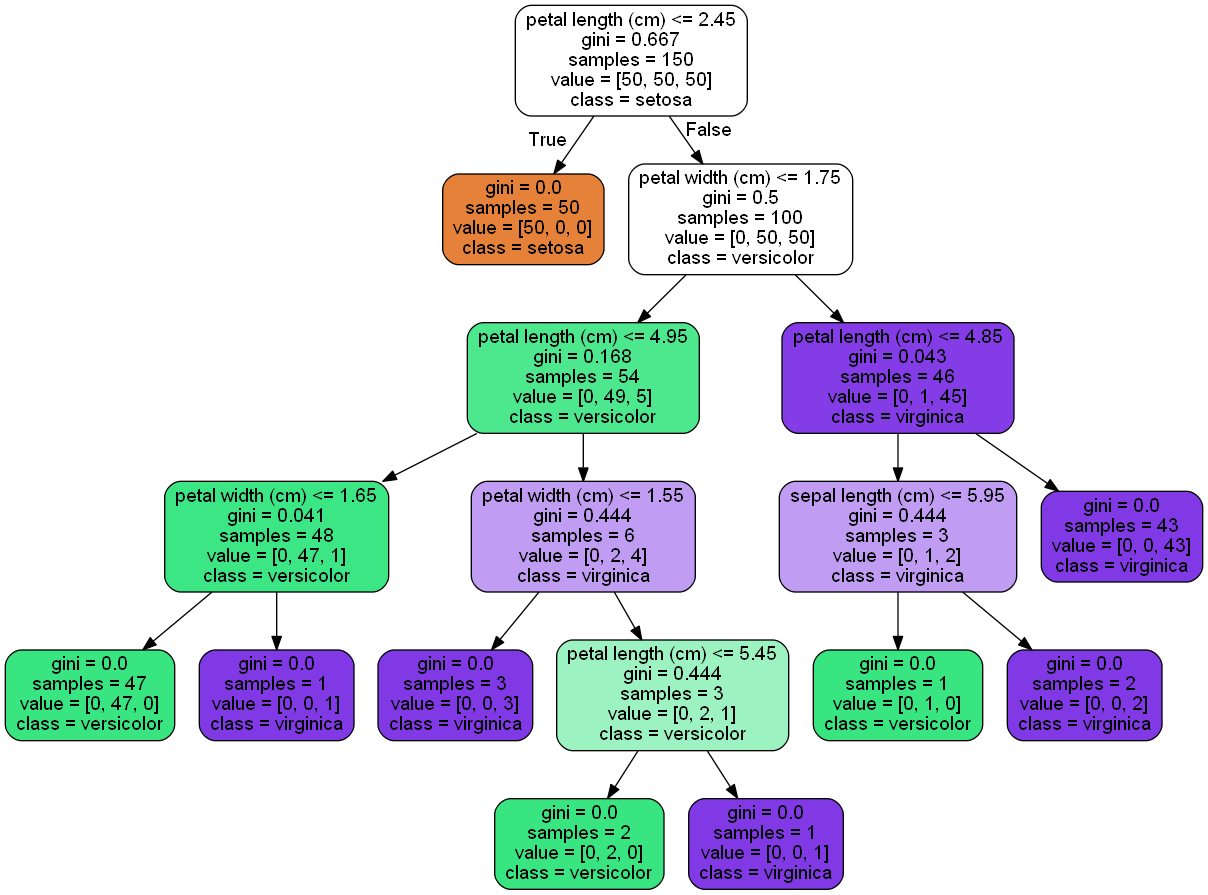

In [25]:
Image(graph.create_png())    #creating image

In [27]:
 graph.write_pdf("Iris_DT.pdf")   #saving graph as pdf

True

# creating image of Decision Tree for OR Dataset

In [30]:
X= [[1,1], [0,1], [1,0], [0,0]]
Y= [1,1,1,0]
clf1 = DecisionTreeClassifier()  #making object of DecisionTreeClassifier
clf1.fit(X, Y)                   #fitting data

DecisionTreeClassifier()

In [35]:
dot_data = export_graphviz(clf1, out_file=None,
                          feature_names=['X1','X2'],
                          class_names=['true', 'false'], filled=True, rounded=True)

In [36]:
graph1 = pydotplus.graph_from_dot_data(dot_data)

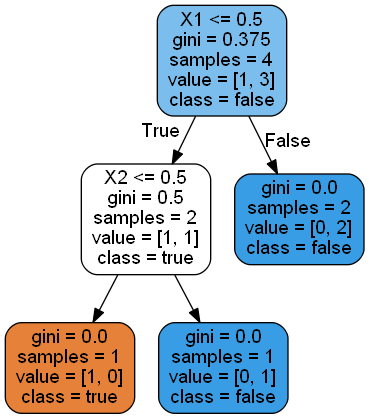

In [37]:
Image(graph1.create_png())    #creating image

In [38]:
graph1.write_pdf("OR_DT.pdf")   #saving graph as pdf

True